In [1]:
# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Imputer, LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from scipy.stats import randint
from IPython.display import Image
from sklearn.model_selection import train_test_split

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer

# Import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
import pydotplus
import seaborn as sns
from scipy import stats

# Read the Data from the CSV

In [3]:
dummy_df = pd.read_csv("C:\\Users\\aa85389\\Desktop\\DS\\HR_Employee_Attrition_Data.csv", na_values =['NA'])

In [4]:
# Shape of data
dummy_df.shape

(2940, 35)

# # Checking the what columns are available in my Dataset

In [5]:
temp = dummy_df.columns.values # Checking the what columns are available in my Dataset 
temp

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [6]:
dummy_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
# Data Types of Columns
dummy_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
dummy_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [9]:
# Set options to inspect all of the columns
pd.options.display.max_columns = 36 

# Inspect the structure of the dataframe
dummy_df.sample(5).transpose()

,926,1935,1473,560,1367
Age,43,46,33,34,27
Attrition,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Frequently,Travel_Rarely,Travel_Rarely
DailyRate,531,1034,1392,167,1354
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,4,18,3,8,2
Education,4,1,4,5,4
EducationField,Marketing,Medical,Life Sciences,Life Sciences,Technical Degree
EmployeeCount,1,1,1,1,1
EmployeeNumber,927,1936,1474,561,1368


In [10]:
dummy_df.index

RangeIndex(start=0, stop=2940, step=1)

In [11]:
dummy_df.values

array([[41, 'Yes', 'Travel_Rarely', ..., 4, 0, 5],
       [49, 'No', 'Travel_Frequently', ..., 7, 1, 7],
       [37, 'Yes', 'Travel_Rarely', ..., 0, 0, 0],
       ...,
       [27, 'No', 'Travel_Rarely', ..., 2, 0, 3],
       [49, 'No', 'Travel_Frequently', ..., 6, 0, 8],
       [34, 'No', 'Travel_Rarely', ..., 3, 1, 2]], dtype=object)

In [12]:
dummy_df.axes

[RangeIndex(start=0, stop=2940, step=1),
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
        'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object')]

In [13]:
dummy_df.get_dtype_counts()

int64     26
object     9
dtype: int64

In [14]:
#Inspect the state of the dataframe
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
Age                         2940 non-null int64
Attrition                   2940 non-null object
BusinessTravel              2940 non-null object
DailyRate                   2940 non-null int64
Department                  2940 non-null object
DistanceFromHome            2940 non-null int64
Education                   2940 non-null int64
EducationField              2940 non-null object
EmployeeCount               2940 non-null int64
EmployeeNumber              2940 non-null int64
EnvironmentSatisfaction     2940 non-null int64
Gender                      2940 non-null object
HourlyRate                  2940 non-null int64
JobInvolvement              2940 non-null int64
JobLevel                    2940 non-null int64
JobRole                     2940 non-null object
JobSatisfaction             2940 non-null int64
MaritalStatus               2940 non-null object
MonthlyIncome         

In [15]:
dummy_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,3.659315,0.360762,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Checking negative value in years

In [16]:
dummy_df['TotalWorkingYears'][dummy_df['TotalWorkingYears'] < 0].sum()

0

# Checking Marital status unique values

In [17]:
dummy_df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

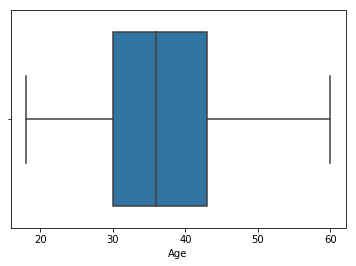

In [18]:
# Boxplot for 'age'
g = sns.boxplot(x=dummy_df["Age"])

# Null Values Check

In [19]:
dummy_df[dummy_df.isnull().any(axis=1)].count()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [20]:
# Check for duplicate observations
dummy_df.duplicated().sum()

0

# Reassign response variable No as 0 and Yes as 1

In [21]:
dummy_df['Attrition'] = dummy_df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
dummy_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,7,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,8,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,9,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,10,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [22]:
# Inspect useless features
dummy_df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

# Distribution of Age

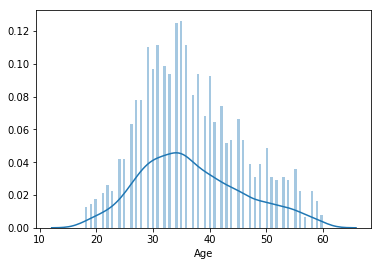

In [23]:
sns.distplot(dummy_df.Age, bins=100)

# Drop useless features and rename the dataframe


In [24]:
df2 = dummy_df.drop(labels = ['Over18','StandardHours','EmployeeCount'], axis = 1)

In [25]:
df2.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Moving Response Variable to the last column

In [26]:
front = df2['Attrition']
df2.drop(labels=['Attrition'], axis=1,inplace=True)
df2.insert(31,'Attrition',front)
df2.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0


# Changing object types to categories

In [27]:
cols = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for col in cols:
    df2[col] = df2[col].astype('category')

In [28]:
df2

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0
5,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,6,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,0
6,59,Travel_Rarely,1324,Research & Development,3,3,Medical,7,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,0
7,30,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,8,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,0
8,38,Travel_Frequently,216,Research & Development,23,3,Life Sciences,9,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,0
9,36,Travel_Rarely,1299,Research & Development,27,3,Medical,10,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,0


In [29]:
df2[cols].nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [30]:
for col in cols:
    display(df2[col].value_counts())

Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64

Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64

Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64

Male      1764
Female    1176
Name: Gender, dtype: int64

Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative    262
Manager                      204
Sales Representative         166
Research Director            160
Human Resources              104
Name: JobRole, dtype: int64

Married     1346
Single       940
Divorced     654
Name: MaritalStatus, dtype: int64

No     2108
Yes     832
Name: OverTime, dtype: int64

# Target Variable: Checking How many employee are Currently Working in Company and How many employee are Left the Company

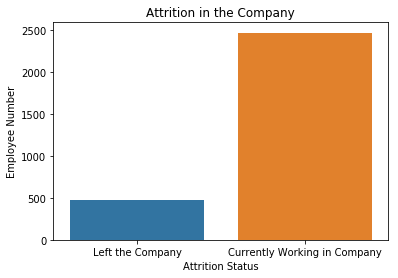

Currently Working in Company    2466
Left the Company                 474
Name: Attrition, dtype: int64

In [31]:
trgt = df2['Attrition'].apply(lambda x: 'Currently Working in Company' if x == 0 else 'Left the Company')
sns.countplot(trgt)
plt.title('Attrition in the Company')
plt.xlabel('Attrition Status')
plt.ylabel('Employee Number')
plt.show()
trgt.value_counts()

# Features : two functions to implement dataframe and graph on each feature of the dataset

In [32]:
# Create Feature Dataframe
def table_df(x): 
    """
    This function creates dataframe for each feature in the dataset
    """
    
    feature = df2.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee ', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    feature['% of Attrition in the Company'] = (feature['Attrition Number'] / 237)*100
        
    return feature

In [33]:
# Create graph for each feature to compare its attrition in the company 

def graph_df(x, y = 'bar', z = 0):
    """
    This function creates graph for each feature in the dataset
    """
    
    feature = df2.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    
    fig0, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    feature.set_index(feature[x], drop=True, inplace=True)
    feature['Total Employee'].plot(kind = y, stacked = True, ax = ax1, 
                                   colormap = 'winter', rot = z)
    feature['% of Attrition in the Relevant Group'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')
    plt.title('Attrition compared to' + " " + x  + " " + "Groups")
    ax1.set_xlabel(x)
    ax1.yaxis.label.set_color('blue')
    ax1.set_ylabel("Total Employee")
    ax2.set_ylabel("Attrition Percentage in the Relevant Group")
    ax2.yaxis.label.set_color('red')
    plt.tight_layout()
    plt.show()

# Age :-Labeling age groups

In [34]:
# Labeling age groups
table_df(x = 'Age')
bins = [17, 21, 25, 35, 60]
group_names = ['(18-21)', '(22-25)', '(26-35)', '(36-60)']
df2['Age'] = pd.cut(df2['Age'], bins, labels = group_names)

In [35]:
# Age Group & Attrition Table
table_df(x = 'Age')

,Age,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,(18-21),82,44,53.658537,18.565401
1,(22-25),164,44,26.829268,18.565401
2,(26-35),1212,232,19.141914,97.890295
3,(36-60),1482,154,10.391363,64.978903


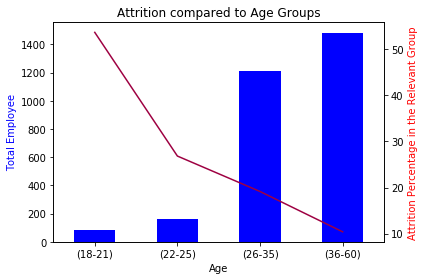

In [36]:
# Attrition Compared to Age Group Graph
graph_df(x = 'Age')

In 18-21 age group, young employees are more likely to leave the company. 
Their attrition proportion to their age group is approximately 53.7% (22 out of 41) 
and that makes up 9% of all attrition (22 out of 237).

If we evaluate overall attrition number in the company, 26-35 age group's attrition number is the highest comparing to other age groups. 
In this age group, we have 19.1 % of employee attrition(116 out 606). 
That makes up approximately 49% of all attrition in the company (116 out of 237).

35-60 age group generally prefers to secure their job in the same company.

# Business Travel :-Business Travel & Attrition Table

In [37]:
table_df(x = 'BusinessTravel')

,BusinessTravel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Non-Travel,300,24,8.000000,10.126582
1,Travel_Frequently,554,138,24.909747,58.227848
2,Travel_Rarely,2086,312,14.956855,131.645570


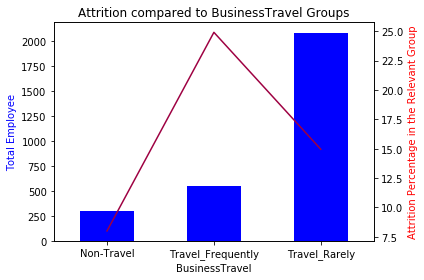

In [38]:
# Attrition compared to Business Travel Group Graph
graph_df(x = 'BusinessTravel')

In [39]:
# In the company, most of the employee travel rarely or don't travel according to their job description. 
# That group compose the 81.1% of entire company(1193). The rest of the company employees which is 19.9% 
# of them has to travel frequently (277 out of 1470).

# The highest attrition number with 156 belongs to the employees who travels rarely.
# That is approximately 15% of employees in that group (156 out of 1043). 
# But when you put this number overall attrition, it makes up 65.8% of all attrition in the company(156 out of 237).

# if we look at the attrition percentage of relevant travel group, the employees 
# who are traveling frequently are in the danger zone. Because they have the highest attrition proportion, 
# which is 24.9%, in their individual travel group(69 out of 277).
# That group's attrition rate composes of the 29.1% of overall attrition in the company (69 out of 237).

# Employees who don't travel in their current role have the lowest attrition rate, which is 8%.

# Department :-Department & Attrition Table

In [40]:
table_df(x = 'Department')

,Department,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,126,24,19.047619,10.126582
1,Research & Development,1922,266,13.839750,112.236287
2,Sales,892,184,20.627803,77.637131


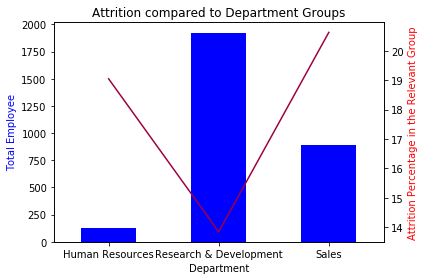

In [41]:
# Attrition compared to Department Graph
graph_df(x = 'Department')

In [42]:
# There are three departments in the company. Research & Development Department has the most attrition number in the company.
# 13.8% of Research & Development Department employee left the organization. In numbers, it is equal to 133, 
# which makes us the 56.1% of all attrition in the company. Actually, that attrition is a big number for company, 
# but compared with other departments, Research & Development Department has the lowest attrition rate in itself 
# as an individual department.

# Sales Department has mostly been affected by the attrition. Because 20.6% of its employees left the organization.
# This is the highest number compared to the other two departments. That attrition makes up 38.8% of the attrition
# in the company (92 out of 237).

# Human Resources Department follows the Sales Department in terms of being affected by attrition itself. 
# 19% of that department employee left the company. But this is not that huge number in terms of whole attrition in company.
# Human Resources Department employee attrition makes up 5% of all attrition in the company (12 out of 237).

# Education :-Labeling education levels

In [43]:
table_df(x = 'Education')
df2['Education'] = df2['Education'].map({1:'Below College', 2:'College', 
                                         3:'Bachelor', 4:'Master', 5:'Doctor'})

In [44]:
# Education Level & Attrition Table
table_df(x = 'Education')

,Education,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Bachelor,1144,198,17.307692,83.544304
1,Below College,340,62,18.235294,26.160338
2,College,564,88,15.602837,37.130802
3,Doctor,96,10,10.416667,4.219409
4,Master,796,116,14.572864,48.945148


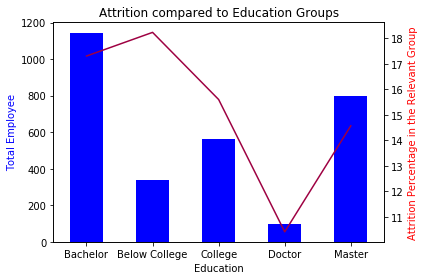

In [45]:
# Attrition compared to Education Level Graph
graph_df(x = 'Education')

In [46]:
# Employees who have bachelor degree have the most attrition number (99 employees) in the company. 
# That makes up 41.8% of all attrition in the company. Employees who have Ph.D. degree 
# composes the least attrition number in the company.

# Employees who have the master, college, and below college degrees are follower of employees 
# who have bachelor degrees in terms of the attrition number in the company respectively.

# Education Field :-Education Field & Attrition Table


In [47]:
table_df(x = 'EducationField')

,EducationField,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,54,14,25.925926,5.907173
1,Life Sciences,1212,178,14.686469,75.105485
2,Marketing,318,70,22.012579,29.535865
3,Medical,928,126,13.577586,53.164557
4,Other,164,22,13.414634,9.282700
5,Technical Degree,264,64,24.242424,27.004219


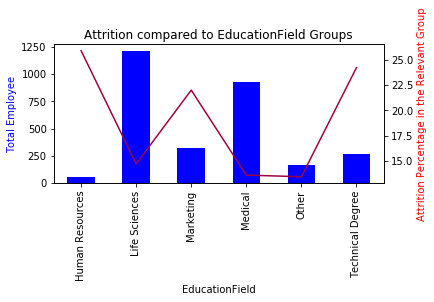

In [48]:
# Attrition compared to Education Field Graph
graph_df(x = 'EducationField', z = 90)

In [49]:
# Employees who have Life Science education level have the most attrition number 
# which makes up the 37.5% of all attrition (89 out of 237).
# But that composes only 14.7% of attrition within Life Sciences field.

# Medical education level have the second highest attrition number which makes up the 13.57% of all attrition (63 out of 237).
# But that composes only 14.7% of attrition within Life Sciences field.

# Besides that, Human Resources, Technical Degree, and Marketing fields are mostly affected by the attrition respectively.
# Their approximately 22-26% employees left the company.

# Environment Satisfaction :- Labeling environment satisfaction

In [50]:
table_df(x = 'EnvironmentSatisfaction')
df2['EnvironmentSatisfaction'] = df2['EnvironmentSatisfaction'].map({1:'Low', 2:'Medium', 
                                                                     3:'High', 4:'Very High'})

In [51]:
# Environment & Attrition Table
table_df(x = 'EnvironmentSatisfaction')

,EnvironmentSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,906,124,13.686534,52.320675
1,Low,568,144,25.352113,60.759494
2,Medium,574,86,14.982578,36.286920
3,Very High,892,120,13.452915,50.632911


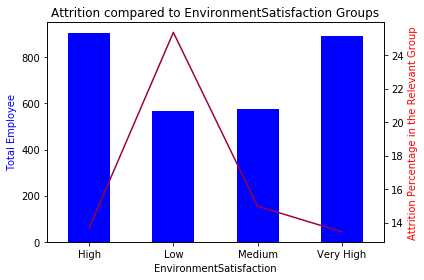

In [52]:
# Attrition compared to Environment Satisfaction Graph
graph_df(x = 'EnvironmentSatisfaction')

In [53]:
# As it may be expected, there is a high attrition rate in the low satisfaction environment. 
# That composes the 30.4 % of the whole company's attrition.

# Shockingly, in the high and very high satisfaction environment, there are still 13.7 % of the
# these each group's employees leave the company. That attrition composes of the 51.5 % of the whole company's attrition. 
# This result might tell us that environment satisfaction is not the one of the main reasons for attrition in the company.

# Gender :- Gender & Attrition Table


In [54]:
table_df(x = 'Gender')

,Gender,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Female,1176,174,14.795918,73.417722
1,Male,1764,300,17.006803,126.582278


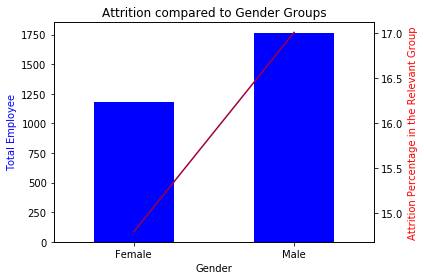

In [55]:
# Attrition compared to Gender Graph
graph_df(x = 'Gender')

In [56]:
# Male employees are more likely to leave the company than female employees

# Job Involvement :-Labeling Job Involvement Groups

In [57]:
table_df(x = 'JobInvolvement')
df2['JobInvolvement'] = df2['JobInvolvement'].map({1:'Low', 2:'Medium', 
                                                   3:'High', 4:'Very High'})

In [58]:
# Job Involvement & Attrition Table
table_df(x = 'JobInvolvement')

,JobInvolvement,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,1736,250,14.400922,105.485232
1,Low,166,56,33.734940,23.628692
2,Medium,750,142,18.933333,59.915612
3,Very High,288,26,9.027778,10.970464


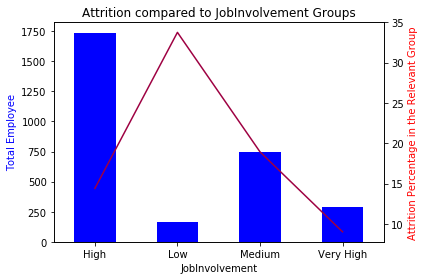

In [59]:
# Attrition compared to Job Involvement Graph
graph_df(x = 'JobInvolvement')

In [60]:
# 59% of all employee's job involvement in the company is in the high category(868 out of 1470). 
# The highest attrition number is also observed in high job involvement category.
# 125 employees in this group, which composes the 52.7% of all attrition, left the company.
# But that is only 14.4% of high job involvement category.

# Medium job involvement category is following the high category group in attrition number with 71 employee.

# Low job involvement category has the highest employee leaving proportion within individual category
# when it is compared to the other categories. 33.7% of Low Job involvement group left the company.

# Job Level:- Labeling job levels


In [61]:
table_df(x = 'JobLevel')
df2['JobLevel'] = df2['JobLevel'].map({1:'Level-1', 2:'Level-2', 
                                       3:'Level-3', 4:'Level-4', 5:'Level-5'})

In [62]:
# Job Level & Attrition Table
table_df(x = 'JobLevel')

,JobLevel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Level-1,1086,286,26.335175,120.675105
1,Level-2,1068,104,9.737828,43.881857
2,Level-3,436,64,14.678899,27.004219
3,Level-4,212,10,4.716981,4.219409
4,Level-5,138,10,7.246377,4.219409


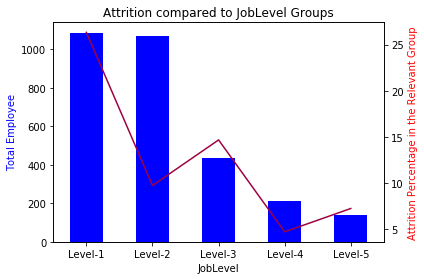

In [63]:
# Attrition compared to Job Level Graph
graph_df(x = 'JobLevel')

In [64]:
# With an increase in job level, there is a decrease in attrition number throughout the company. 
# The highest attrition is observed in the job level-1. 143 employees in the job level-1, 
# who compose the 60.3% of all attrition, left the company.

# Job Role:- Job Role & Attrition Table


In [65]:
table_df(x = 'JobRole')

,JobRole,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Healthcare Representative,262,18,6.870229,7.594937
1,Human Resources,104,24,23.076923,10.126582
2,Laboratory Technician,518,124,23.938224,52.320675
3,Manager,204,10,4.901961,4.219409
4,Manufacturing Director,290,20,6.896552,8.438819
5,Research Director,160,4,2.500000,1.687764
6,Research Scientist,584,94,16.095890,39.662447
7,Sales Executive,652,114,17.484663,48.101266
8,Sales Representative,166,66,39.759036,27.848101


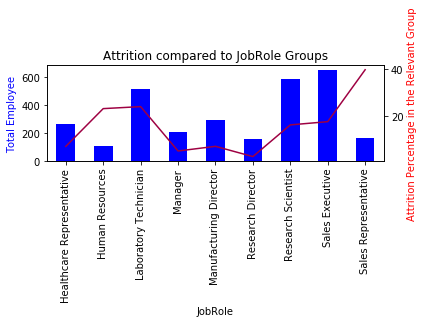

In [66]:
# Attrition compared to Job Role Graph
graph_df(x = 'JobRole', z = 90)

In [67]:
# Laboratory Technician has the most attrition number with the 26.2% of all attrition in the company (62 out of 237 employees).
# Sales Executive and Research Scientist are following the Laboratory Technician in attrition throughout the company
# with the 57 and 47 employees respectively. Those both job roles' attrition composes 44% of whole company's attrition.

# Sales Representative role has been affected mostly by the attrition. Sales Representative has lost approximately 40% 
# of its' employee. Laboratory Technician and Human Resources followed it in terms of losing employee as a job role.

# On the other hand, Research Director job role has the lowest attrition number not only in the company (2.5%) 
# but only within its own job role(0.8%).

# Job Satisfaction :-  Labeling Job Role 


In [68]:
table_df(x = 'JobSatisfaction')
df2['JobSatisfaction'] = df2['JobSatisfaction'].map({1:'Low', 2:'Medium',
                                                     3:'High', 4:'Very High'})

In [69]:
# Job Satisfaction & Attrition Table
table_df(x = 'JobSatisfaction')

,JobSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,884,146,16.515837,61.603376
1,Low,578,132,22.837370,55.696203
2,Medium,560,92,16.428571,38.818565
3,Very High,918,104,11.328976,43.881857


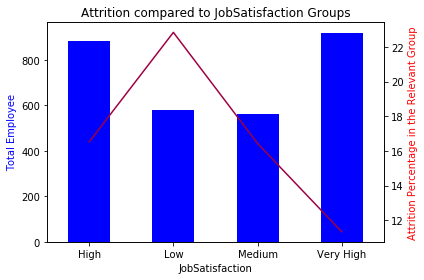

In [70]:
# Attrition compared to Job Satisfaction
graph_df(x = 'JobSatisfaction')

In [71]:
# In high job satisfaction, surprisingly employees leave the company most and their attrition
# composes 30.8% of company's attrition. From this picture, I assume that job satisfaction
# should not be the main reason for employees to leave the company.

# As it may be expected, in low job satisfaction, employees leave the company more than other groups except high satisfaction.
# They compose 27.8% of all attrition in the company.

# Marital Status :- Job Satisfaction & Attrition Table


In [72]:
table_df(x = 'MaritalStatus')

,MaritalStatus,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Divorced,654,66,10.091743,27.848101
1,Married,1346,168,12.481426,70.886076
2,Single,940,240,25.531915,101.265823


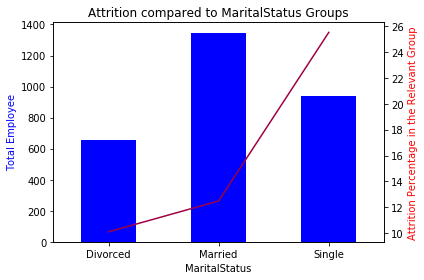

In [73]:
# Attrition compared to Job Satisfaction
graph_df(x = 'MaritalStatus')

In [74]:
# Single employees are more likely to leave the company. They have the highest attrition number 
# and compose of the 50.6% employees who left the company. Married and Divorced employees are the followers 
# of Single employees in the attrition number of the company respectively.

# Monthly Income :- Labeling Monthly Income Level


In [75]:
table_df(x = "MonthlyIncome")
bins = [1000, 2000, 3000, 4000, 5000, 7500, 9000, 11000, 15000, 20000]
group_names = ['1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-7500', 
               '7500-9000', '9000-11000', '11000-15000', '15000-20000']             
df2["MonthlyIncome"] = pd.cut(df2["MonthlyIncome"], bins, labels = group_names)

In [76]:
# Monthly Income & Attrition Table
table_df(x = "MonthlyIncome")

,MonthlyIncome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1000-2000,66,36,54.545455,15.189873
1,2000-3000,724,190,26.243094,80.168776
2,3000-4000,296,48,16.216216,20.253165
3,4000-5000,412,52,12.621359,21.940928
4,5000-7500,620,60,9.677419,25.316456
5,7500-9000,156,20,12.820513,8.438819
6,9000-11000,236,44,18.644068,18.565401
7,11000-15000,164,14,8.536585,5.907173
8,15000-20000,266,10,3.759398,4.219409


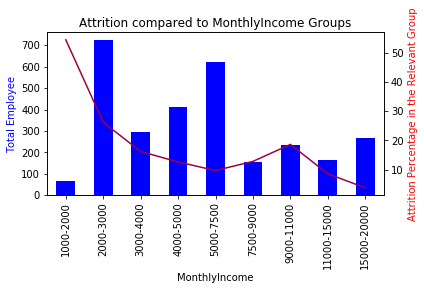

In [77]:
# Attrition compared to Monthly Income Level Graph
graph_df(x = "MonthlyIncome", z = 90)

In [78]:
# 2000-3000 dollars monthly income level, there is a high attrition and it compose the 40% of attrition in the company.

# 1000-2000 dollars monthly income level, there is a high attrition in its own income group level, which is 54.5%.

# As the monthly income increase, it is observed that there is a decrease in attrition. But, 
# in 9000-11000 dollars monthly income level, there is a rise in attrition of its own monthly income group level.

# Numbers Companies Worked :- Labeling Numbers Companied Worked Groups


In [79]:
table_df(x = 'NumCompaniesWorked')
bins = [0, 1, 2, 3, 4, 5, 10]
group_names = ['0', '1', '2', '3', '4', '5+']             
df2['NumCompaniesWorked'] = pd.cut(df2['NumCompaniesWorked'], bins, labels = group_names, 
                                        include_lowest = True, right = False)

In [80]:
# Numbers Companied Worked & Attrition Table
table_df(x = 'NumCompaniesWorked')

,NumCompaniesWorked,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,394,46,11.675127,19.409283
1,1,1042,196,18.809981,82.700422
2,2,292,32,10.958904,13.502110
3,3,318,32,10.062893,13.502110
4,4,278,34,12.230216,14.345992
5,5+,616,134,21.753247,56.540084


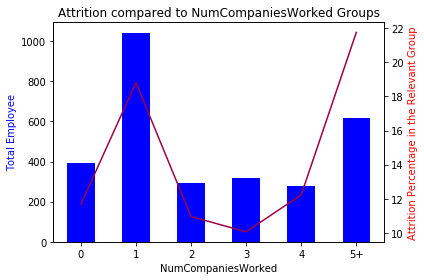

In [81]:
# Attrition compared to Numbers of Companies Worked Graph
graph_df(x = 'NumCompaniesWorked')

In [82]:
# If employees have one company experience before current company, they are more likely to leave the company. 
# They have the highest attrition number and compose of 41.3% all attrition in the company. 
# Besides, if employees don't have any experience in other company, they have the second most attrition number.

# Also, employees, who has more experience such as working in 5,6,7, and 9 companies before the current company,
# have the highest attrition in their individual experienced group.

# Over Time :- Numbers Companied Worked & Attrition Table


In [83]:
table_df(x = 'OverTime')

,OverTime,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,No,2108,220,10.436433,92.827004
1,Yes,832,254,30.528846,107.172996


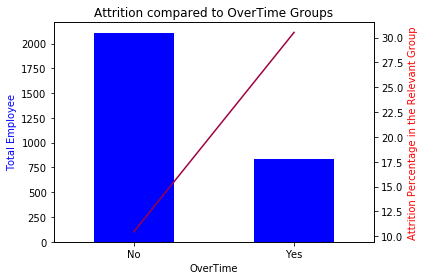

In [84]:
# Attrition compared to Numbers of Companies Worked Graph
graph_df(x = 'OverTime')

In [85]:
# 28.3% of employees have the over time work in the company and they have higher attrition number than employees 
# who don't have. There is not a significant difference between these two groups' attrition number. 
# But if you compare individually both groups, over time employees are much more likely to leave the company.

# Percent Salary Hike :-Percent Salary Hike & Attrition Table

In [86]:
table_df(x = 'PercentSalaryHike')
bins = [10, 14, 18, 22, 25]
group_names = ['11-14', '15-18', '19-22', '23-25']             
df2['PercentSalaryHike'] = pd.cut(df2['PercentSalaryHike'], bins, labels = group_names)


In [87]:
# Percent Salary Hike & Attrition Table
table_df(x = 'PercentSalaryHike')

,PercentSalaryHike,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,11-14,1636,264,16.136919,111.392405
1,15-18,700,118,16.857143,49.789030
2,19-22,470,66,14.042553,27.848101
3,23-25,134,26,19.402985,10.970464


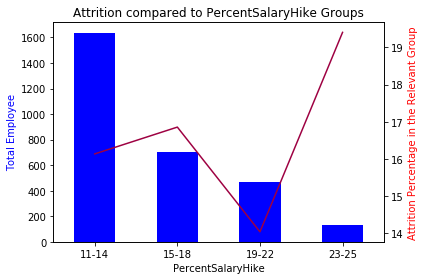

In [88]:
# Attrition compared to Percent Salary Hike
graph_df(x = 'PercentSalaryHike')

In [89]:
# As it may be expected, the higher percent salary hike is, the more employees are likely and willingly to 
# stay in the current company. The employees who have the highest percent salary hikes are more likely to leave the company.
# The reason for that might be due to the fact that they are more qualified and have the chance to find better
# position in other companies or due to the retirement.

# Performance Rating :- Performance Rating & Attrition Table


In [90]:
table_df(x = 'PerformanceRating')

,PerformanceRating,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,3,2488,400,16.077170,168.776371
1,4,452,74,16.371681,31.223629


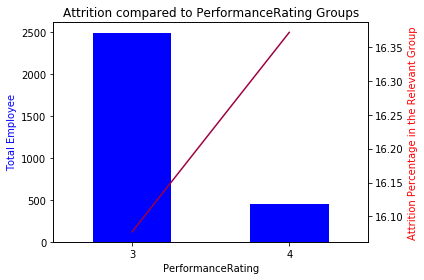

In [91]:
# Attrition compared to Performance Rating
graph_df(x = 'PerformanceRating')


In [92]:
# Performance rating has two category such as 3 and 4. 84.6% of employees are in the performance rating 3 group 
# and 16.08 attrition. The rest of the employees are in performance rating 4 group 
# and their attrition percentage(%16.37) is a little bit higher than previous group.

# Total Working Years:- Total Working Years & Attrition Table


In [93]:
table_df(x = 'TotalWorkingYears')
bins = [0, 1, 5, 10, 15, 20, 40]
group_names = ['1', '2-5', '6-10', '11-15', '16-20', '20+']             
df2['TotalWorkingYears'] = pd.cut(df2['TotalWorkingYears'], bins, labels = group_names, 
                                  include_lowest = True)

In [94]:
# Total Working Years & Attrition Table
table_df(x = 'TotalWorkingYears')

,TotalWorkingYears,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,184,90,48.913043,37.974684
1,2-5,448,92,20.535714,38.818565
2,6-10,1214,182,14.991763,76.793249
3,11-15,382,48,12.565445,20.253165
4,16-20,298,30,10.067114,12.658228
5,20+,414,32,7.729469,13.502110


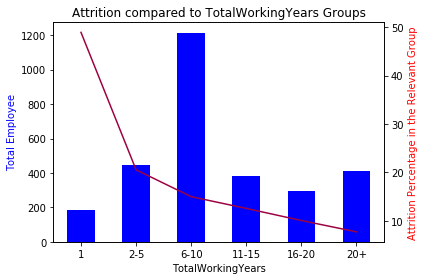

In [95]:
graph_df(x = 'TotalWorkingYears')

In [96]:
# Employees who have one year or less working experience are more likely to leave the company and compose the 18.98% of 
# all attrition throughout the company. In addition to that, employees who have 6-10 years' 
# experience have also second highest attrition percentage throughout the company and it compose the 38.4% of all attrition.

# Years in Current Role:-Labeling Years in Current Role Groups


In [97]:
table_df(x = 'YearsInCurrentRole')
bins = [0, 1, 4, 6, 7, 10, 18]
group_names = ['1', '2-4', '5-6', '7', '8-10', '10+']             
df2['YearsInCurrentRole'] = pd.cut(df2['YearsInCurrentRole'], bins, labels = group_names, 
                                   include_lowest = True)

In [98]:
# Years at Company & Attrition Table
table_df(x = 'YearsAtCompany')

,YearsAtCompany,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,88,32,36.363636,13.502110
1,1,342,118,34.502924,49.789030
2,2,254,54,21.259843,22.784810
3,3,256,40,15.625000,16.877637
4,4,220,38,17.272727,16.033755
5,5,392,42,10.714286,17.721519
6,6,152,18,11.842105,7.594937
7,7,180,22,12.222222,9.282700
8,8,160,18,11.250000,7.594937
9,9,164,16,9.756098,6.751055


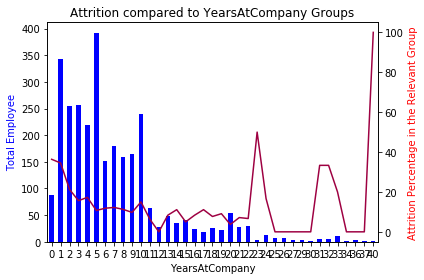

In [99]:
# Years in Current Role & Attrition Graph 
graph_df(x = 'YearsAtCompany')

In [100]:
# Employees who don't fulfill their first year and in their first year in their current role are more likely 
# to leave the company. That might be result of challenge or not satisfied with the current role.

# Employees who have 2-5 years' experience in that company compose of the maximum attrition percentage 
# and number in the company.

# Besides that, after years in current role, employees are willing to leave the company. 
# That might be result of looking for better opportunities in other companies.

# Correlation Matrix

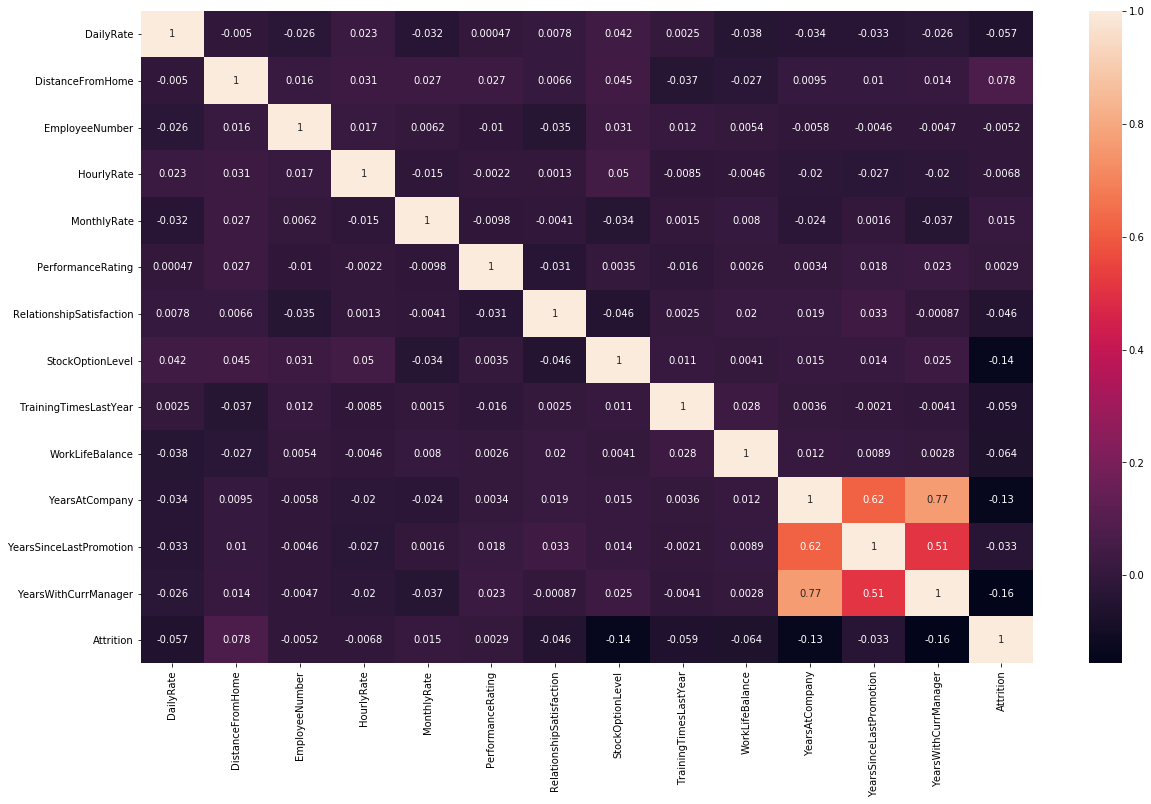

In [101]:
corr_matrix = df2.corr()
f , ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_matrix, vmax=1, annot=True)

# Hypothesis Testing (Examining Attrition in Gender throughout the company)

In [102]:
# Gender & Attrition Table
table_df(x = 'Gender')

,Gender,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Female,1176,174,14.795918,73.417722
1,Male,1764,300,17.006803,126.582278


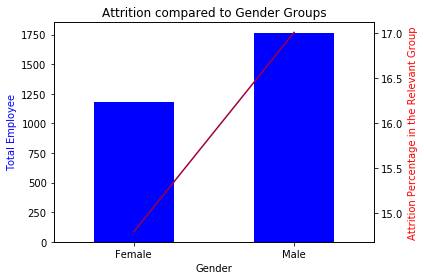

In [103]:
# Attrition compared to Gender Graph
graph_df(x = 'Gender')

In [104]:
# Assign female and  male into variables
female = df2[df2['Gender'] == 'Female']
male = df2[df2['Gender'] == 'Male']

# Find the mean for female and male employees attrition
female_attrition_mean = female['Attrition'].mean()
male_attrition_mean = male['Attrition'].mean()
print ('Female attrition mean: {}'.format(female_attrition_mean))
print ('Male attrition mean: {}'.format(male_attrition_mean))

# Find the difference of female and male employees attrition
diff_mean = male_attrition_mean - female_attrition_mean
print ('Difference of mean between male and female employees attrition: {}'.format(diff_mean))

Female attrition mean: 0.14795918367346939
Male attrition mean: 0.17006802721088435
Difference of mean between male and female employees attrition: 0.022108843537414963


# z-score

In [105]:
# Compute z-score
male_attrition = np.sum(male['Attrition'])
female_attrition = np.sum(female['Attrition'])
male_ln = len(male)
female_ln = len(female)            
phat = (male_attrition + female_attrition) / (male_ln + female_ln)
z = (diff_mean) / np.sqrt(phat * (1 - phat) * (( 1/ float(male_ln)) + (1/float(female_ln))))
print ('z score:{}'.format(z))

z score:1.5970074265453604


# p-value


In [106]:
# Compute p-value
p = stats.norm.cdf(-z)*2
print ('p-value:{}'.format(p))
# p-value:0.2587903704911598


p-value:0.1102640517969645


# Margin of error

In [107]:
# Compute margin of error
moe = 1.96 * np.sqrt(phat * (1 - phat) * (( 1/ float(male_ln)) + (1/float(female_ln))))
print("Margin of Error: {}".format(moe))


Margin of Error: 0.02713408379513413


# Confidence Interval

In [108]:
# Compute confidence interval
ci = diff_mean + np.array([-1, 1]) * moe
print("Confidence interval: {}".format(ci))

Confidence interval: [-0.00502524  0.04924293]


# Conclusion:

In [109]:
# The p-value is above the significance level (0.05). So, I fail to reject the null hypothesis. 
# We can conclude that there is no enough evidence to reject the assumption of no difference 
# in the proportion of attrition for male and female employees in the company

# Machine Learning

In [110]:
# #  Decide what features we should keep
# 'EmployeeNumber' is evidently irrelevant features, so we can remove them. Also, the 'PerformanceRating' 
# had no effect on attrition. As we noticed before, all employees were graded as either 3 or 4. 
# In this analysis we noticed that turnover was practically the same in both cases.

In [111]:
df2.drop(['EmployeeNumber', 'PerformanceRating'], axis = 1, inplace = True)

# Transform categorical data into numerical


In [112]:
# Extract categorical features from dataset
cat_df = df2.select_dtypes(include='category')
cat_df.columns

Index(['Age', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'TotalWorkingYears',
       'YearsInCurrentRole'],
      dtype='object')

In [113]:
# Extract categorical features from dataset
num_df = df2.select_dtypes(include='int64')
num_df.columns

Index(['DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyRate',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

# With that information, we can now encode the categorical data into a binary representation.


In [114]:
# One hot encode categorical dataframe
features_categorical = pd.get_dummies(cat_df, drop_first=True) #Convert categorical variable into dummy/indicator variables
features_categorical.head()

,Age_(22-25),Age_(26-35),Age_(36-60),BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,...,NumCompaniesWorked_2,NumCompaniesWorked_3,NumCompaniesWorked_4,NumCompaniesWorked_5+,OverTime_Yes,PercentSalaryHike_15-18,PercentSalaryHike_19-22,PercentSalaryHike_23-25,TotalWorkingYears_2-5,TotalWorkingYears_6-10,TotalWorkingYears_11-15,TotalWorkingYears_16-20,TotalWorkingYears_20+,YearsInCurrentRole_2-4,YearsInCurrentRole_5-6,YearsInCurrentRole_7,YearsInCurrentRole_8-10,YearsInCurrentRole_10+
0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
2,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,...,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [115]:
# concatenate the features
df3 = pd.concat([num_df, features_categorical], axis=1)
df3.head()

,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Age_(22-25),Age_(26-35),Age_(36-60),BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,...,NumCompaniesWorked_2,NumCompaniesWorked_3,NumCompaniesWorked_4,NumCompaniesWorked_5+,OverTime_Yes,PercentSalaryHike_15-18,PercentSalaryHike_19-22,PercentSalaryHike_23-25,TotalWorkingYears_2-5,TotalWorkingYears_6-10,TotalWorkingYears_11-15,TotalWorkingYears_16-20,TotalWorkingYears_20+,YearsInCurrentRole_2-4,YearsInCurrentRole_5-6,YearsInCurrentRole_7,YearsInCurrentRole_8-10,YearsInCurrentRole_10+
0,1102,1,94,19479,1,0,0,1,6,0,5,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,279,8,61,24907,4,1,3,3,10,1,7,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
2,1373,2,92,2396,2,0,3,3,0,0,0,1,0,0,1,0,1,1,...,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1392,3,56,23159,3,0,3,3,8,3,0,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,591,2,40,16632,4,1,3,3,2,2,2,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [116]:
# Moving Response Variable to the last column
response = df3['Attrition']
df3 = df3.drop(labels=['Attrition'], axis=1)
df3.insert(61,'Attrition',response)
df3.head()

,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Age_(22-25),Age_(26-35),Age_(36-60),BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,...,NumCompaniesWorked_3,NumCompaniesWorked_4,NumCompaniesWorked_5+,OverTime_Yes,PercentSalaryHike_15-18,PercentSalaryHike_19-22,PercentSalaryHike_23-25,TotalWorkingYears_2-5,TotalWorkingYears_6-10,TotalWorkingYears_11-15,TotalWorkingYears_16-20,TotalWorkingYears_20+,YearsInCurrentRole_2-4,YearsInCurrentRole_5-6,YearsInCurrentRole_7,YearsInCurrentRole_8-10,YearsInCurrentRole_10+,Attrition
0,1102,1,94,19479,1,0,0,1,6,0,5,0,0,1,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,279,8,61,24907,4,1,3,3,10,1,7,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
2,1373,2,92,2396,2,0,3,3,0,0,0,0,0,1,0,1,1,0,...,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1392,3,56,23159,3,0,3,3,8,3,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,591,2,40,16632,4,1,3,3,2,2,2,0,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


# Data Preprocessing :- Separate response variable and features

In [117]:
X = df3.iloc[:, :-1].values   
y = df3.iloc[:, 61].values


In [118]:
y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

# Splitting the dataset into the Training set and Test set

In [119]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling

In [120]:
from imblearn.over_sampling import SMOTE

In [121]:
# using the StandardScaler to scale the data.
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Handling imbalanced dataset

In [122]:
# We have a imbalanced dataset with majority of observations being of one type ('No' which is '0' in the dataset) 
# in our case. We have about 84 % of observations having 'No' and only 16 % of 'Yes' and hence this is an imbalanced dataset. 
# To deal with such a imbalanced dataset we have to take certain measures, otherwise the performance of our model
# can be significantly affected. We have two approaches to curb such datasets: oversampling, which increase the 
# number of observations corresponding to the minority class, or undersampling which decrease the 
# number of observations for the majority class. Below I have used an oversampling technique known 
# as the SMOTE(Synthetic Minority Oversampling Technique) which randomly creates some 'Synthetic' instances 
# of the minority class so that the net observations of both the class get balanced out.

In [123]:
sm = SMOTE(random_state = 0)
X_train_sm,  y_train_sm = sm.fit_sample(X_train, y_train)

# Principal Component Analysis

In [124]:
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.07997655, 0.06098616, 0.04355497, 0.0382885 , 0.03395704,
       0.02959649, 0.02850818, 0.02676472, 0.02454862, 0.02406755,
       0.02348032, 0.0229718 , 0.02232083, 0.02181484, 0.02145736,
       0.02020421, 0.01999988, 0.01945189, 0.01939641, 0.01905941,
       0.01848729, 0.01800106, 0.01770638, 0.01746472, 0.01730404,
       0.0170567 , 0.01663702, 0.01632726, 0.01610811, 0.01585975,
       0.01560523, 0.01495635, 0.01464197, 0.01451946, 0.01416471,
       0.01404374, 0.0131735 , 0.01283919, 0.0122023 , 0.01186567,
       0.01163285, 0.01140669, 0.01070695, 0.01006814, 0.00875871,
       0.007388  , 0.00571713, 0.00526777, 0.0040587 , 0.00335642,
       0.0030608 , 0.00236442, 0.00190217, 0.00171926, 0.00085647,
       0.00064312, 0.00054455, 0.00046601, 0.00038331, 0.00018274,
       0.00014564])

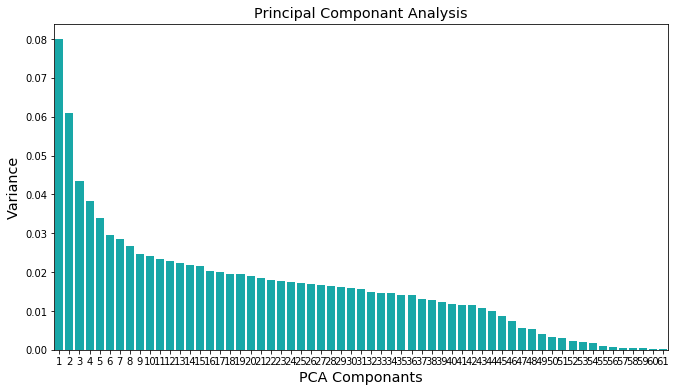

In [125]:
df_pca = pd.DataFrame({'var':explained_variance, 'PC':list(range(1,62))})
fig = plt.figure(figsize=(11,6))
fig=sns.barplot(x = 'PC', y = "var", data = df_pca, color = "c")
plt.xlabel('PCA Componants', fontsize = 'x-large')
plt.ylabel('Variance', fontsize = 'x-large')
plt.title('Principal Componant Analysis', fontsize = 'x-large')
plt.show()

In [126]:
# We don't see any sharp drop off in the percentage of variance explained from this screen plot, suggesting no natural cut off
# point in keeping certain dimensions and discarding others. Since the number of the components is not small and 
# the linear relationships among them are not strong, it is hard to interpret the principal components.

In [127]:
df_cumus = pd.DataFrame({'total_var':np.cumsum(df_pca['var'].values)})
df_cumus

,total_var
0,0.079977
1,0.140963
2,0.184518
3,0.222806
4,0.256763
5,0.286360
6,0.314868
7,0.341633
8,0.366181
9,0.390249


In [128]:
# This cumulative components scores shows that if we want to be able to explain more than 90% of the variation,
# we need to get at least 27 features in our model.

# Classification Functions for Machine Learning Algorithms

# Classification Function with All Features

In [129]:
def classification_all_features(Model):
    """
    This function apply machine learning algorithms into the all features in the dataset and 
    returns confusion matrix and f1 score which will be used in models comparison.
    """
    
    # Separate response variable and features
    X = df3.iloc[:, :-1].values   
    y = df3.iloc[:, 45].values
    
    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
    # Feature Scaling
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = model.predict(X_test)
    
    global score
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))
    
    # Making the Confusion Matrix
    print(confusion_matrix(y_test, y_pred))

# Classification Function with Hyperparameter Tuning (all features)

In [130]:
def classification_tuning_all(regularizator):
    """
    This function apply hyperparameter tuning to machine learning algorithms with all features and 
    returns best parameters, confusion matrix and f1 score which will be used in models comparison.
    """
    
    # Separate response variable and features
    X = df3.iloc[:, :-1].values   
    y = df3.iloc[:, 45].values
    
    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
    # Feature Scaling
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
   # Hyperparameter with regularizator
    model_cv = regularizator
    
    # Fitting classifier to the Training set (all features)
    model_cv.fit(X_train, y_train)
    
      # Predicting the Test set results
    y_pred = model_cv.predict(X_test)

    global score 
    # Assign f1 score to a variable
    score = model_cv.score(X_test, y_test)

    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

    # Printing Tuned Model Parameters
    print("Tuned Model Parameters: {}".format(model_cv.best_params_))

    # Making the Confusion Matrix
    print(confusion_matrix(y_test, y_pred))

# Classification Function with Principal Component Analysis(PCA) Features

In [131]:
def classification_pca_features(Model):
    """
    This function apply machine learning algorithms into the all PCA features and 
    returns confusion matrix and f1 score which will be used in models comparison.
    """
    
    # Separate response variable and features
    X = df3.iloc[:, :-1].values   
    y = df3.iloc[:, 45].values
    
    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
    # Feature Scaling
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    # Extracting 27 features from PCA
    pca = PCA(n_components = 27)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(X_train_pca, y_train)
    
    # Predicting the Test set results
    y_pred = model.predict(X_test_pca)
    
    global score
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))
    
    # Making the Confusion Matrix
    print(confusion_matrix(y_test, y_pred))

# Classification Function with Hyperparameter Tuning with PCA features

In [132]:
def classification_tuning_pca(regularizator):
    """
    This function apply hyperparameter tuning to machine learning algorithms with pca features and 
    returns best parameters, confusion matrix and f1 score which will be used in models comparison.
    """
    
    # Separate response variable and features
    X = df3.iloc[:, :-1].values   
    y = df3.iloc[:, 45].values
    
    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
    # Feature Scaling
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    # Extracting 27 features from PCA
    pca = PCA(n_components = 27)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Hyperparameter with regularizator
    model_cv = regularizator
    
    # Fitting classifier to the Training set (all features)
    model_cv.fit(X_train_pca, y_train)

    # Predicting the Test set results
    y_pred = model_cv.predict(X_test_pca)
    
    global score 
    # Assign f1 score to a variable
    score = model_cv.score(X_test_pca, y_test)

    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

    # Printing Tuned Model Parameters
    print("Tuned Model Parameters: {}".format(model_cv.best_params_))

    # Making the Confusion Matrix
    print(confusion_matrix(y_test, y_pred))

# Logistic Regression

In [133]:
# Function for logistic regression with all features
classification_all_features(LogisticRegression(random_state = 0))

f1 score: 1.0
[[671   0]
 [  0  64]]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [134]:
# Assign f1 score to a variable for the model comparison 
lrg1 = score

In [135]:
#Logistic Regression with Hyperparameter Tuning (all features)

In [136]:
# Set up parameters
param_grid = {'C': np.arange(1, 1000)}



In [137]:
# Function for hyperparameter tuning to logistic regression with all features
classification_tuning_all(GridSearchCV(LogisticRegression(random_state = 0), 
                                       param_grid, cv=5, scoring = 'f1_weighted'))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


f1 score: 1.0
Tuned Model Parameters: {'C': 1}
[[671   0]
 [  0  64]]


In [138]:
#  Assign f1 score to a variable for the model comparison
lrg2  = score

# Logistic Regression with PCA features

In [139]:
# Function for logistic regression with PCA features
classification_pca_features(LogisticRegression(random_state = 0))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


f1 score: 1.0
[[671   0]
 [  0  64]]


In [140]:
# Assign f1 score to a variable for the model comparison 
lrg3 = score

# Logistic Regression with Hyperparameter Tuning (PCA features)

In [141]:
# Set up parameters
param_grid={'C': np.arange(1, 1000)}

# Functions for tuning logistic regression with pca features
classification_tuning_pca(GridSearchCV(LogisticRegression(random_state = 0), 
                                       param_grid, cv = 5, scoring = 'f1_weighted'))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


f1 score: 1.0
Tuned Model Parameters: {'C': 1}
[[671   0]
 [  0  64]]


In [142]:
# Assign f1 score to a variable for the model comparison 
lrg4 = score

# Decision Tree Classification

In [143]:
# Function for decision tree classification model with all features
classification_all_features(DecisionTreeClassifier(criterion = 'gini', random_state = 0))

f1 score: 1.0
[[671   0]
 [  0  64]]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [144]:
# Assign f1 score to a variable for the model comparison
dtr1 = score

In [145]:
#Decision Tree Classification with Hyperparameter Tuning (all features)

In [146]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": np.linspace(1, 32, 32, endpoint=True),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Function for hyperparameter tuning to decision tree classification with all features
classification_tuning_all(RandomizedSearchCV(DecisionTreeClassifier(random_state = 0), 
                                             param_dist, cv=5, scoring = 'f1_weighted'))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


f1 score: 1.0
Tuned Model Parameters: {'criterion': 'gini', 'max_depth': 12.0, 'min_samples_leaf': 8}
[[671   0]
 [  0  64]]


In [147]:
# Assign f1 score to a variable for the model comparison
dtr2 = score

# Decision Tree Classification with PCA features

In [148]:
# Function for decision tree classification with PCA features
classification_pca_features(DecisionTreeClassifier())

f1 score: 0.9588060276128763
[[652  19]
 [ 12  52]]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [149]:
# Assign f1 score to a variable for the model comparison 
dtr3 = score

In [150]:
#Decision Tree with Hyperparameter Tuning (PCA features)

In [151]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": np.linspace(1, 32, 32, endpoint = True),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Functions for tuning decision trees with pca features
classification_tuning_pca(RandomizedSearchCV(DecisionTreeClassifier(), 
                                             param_dist, cv = 5, scoring = 'f1_weighted', random_state = 0))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


f1 score: 0.9613469276892561
Tuned Model Parameters: {'criterion': 'entropy', 'max_depth': 14.0, 'min_samples_leaf': 1}
[[659  12]
 [ 16  48]]


In [152]:
# Assign f1 score to a variable for the model comparison 
dtr4 = score

# Random Forest Classification

In [153]:
# Random Forest Classification with all features

In [154]:
# Function for Random Forest Classification model with all features
classification_all_features(RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0))

f1 score: 0.9972593402440341
[[671   0]
 [  2  62]]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [155]:
classification_all_features(RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 0))

f1 score: 0.9972593402440341
[[671   0]
 [  2  62]]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [156]:
# Assign f1 score to a variable for model comparison
rfc1 = score

In [157]:
print(rfc1)

0.9972593402440341


In [158]:
#Random Forest Classification with Hyperparameter Tuning (all features)

In [159]:
# Setup the parameters and distributions to sample from: param_dist
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Function for hyperparameter tuning to random forest classification with all features
classification_tuning_all(RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 0), 
                                             param_distributions = random_grid, n_iter = 100, cv = 5, 
                                             verbose=2, random_state=0, n_jobs = -1, scoring = 'f1_weighted'))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.1min finished


f1 score: 1.0
Tuned Model Parameters: {'n_estimators': 1115, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}
[[671   0]
 [  0  64]]


In [160]:
# Assign f1 score to a variable for model comparison
rfc2 = score

In [161]:
#Random Forest Classification with PCA features

In [162]:
# Function for Random Forest Classification with PCA features
classification_pca_features(RandomForestClassifier(random_state=0))

f1 score: 0.9772017888803768
[[669   2]
 [ 14  50]]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [163]:
# Assign f1 score to a variable for the model comparison 
rfc3 = score

In [164]:
#Random Forest with Hyperparameter Tuning (PCA features)
print(rfc3)

0.9772017888803768


In [165]:
# Seting up parameters
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Functions for tuning Random Forest classification with pca features
classification_tuning_pca(RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, 
                                             n_iter = 100, cv = 5, verbose=2, random_state=0, n_jobs = -1, 
                                             scoring = 'f1_weighted'))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 20.1min finished


f1 score: 0.9829013416602824
Tuned Model Parameters: {'n_estimators': 673, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90}
[[671   0]
 [ 12  52]]


In [166]:
# Assign f1 score to a variable for the model comparison 
rfc4 = score

# K-NN Classification
K-NN Classification with all features

In [167]:
# Function for K-NN classification with all features
classification_all_features(KNeighborsClassifier())

f1 score: 0.9672032659685906
[[671   0]
 [ 22  42]]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [168]:
# Assign f1 score to a variable for the model comparison
knn1 = score

# K-NN Classification with Hyperparameter Tuning (all features)

In [169]:
# Set up parameters
param_grid={'n_neighbors': np.arange(1, 50)}

# Function for hyperparameter tuning to K-NN classification with all features
classification_tuning_all(GridSearchCV(KNeighborsClassifier(), 
                                       param_grid, cv = 5, scoring = 'f1_weighted'))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


f1 score: 0.9889562650540733
Tuned Model Parameters: {'n_neighbors': 1}
[[669   2]
 [  6  58]]


In [170]:
# Assign f1 score to a variable for the model comparison 
knn2 = score

# K-NN Classification with PCA features

In [171]:
# Function for K-NN Classification with PCA features
classification_pca_features(KNeighborsClassifier())

f1 score: 0.9688449358254144
[[671   0]
 [ 21  43]]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [172]:
# Assign f1 score to a variable for the model comparison 
knn3 = score

# K-NN with Hyperparameter Tuning (PCA features)

In [173]:
# Setting up parameters
param_grid={'n_neighbors': np.arange(1, 50)}

# Functions for tuning K-NN classification with pca features
classification_tuning_pca(GridSearchCV(KNeighborsClassifier(), param_grid, 
                                       cv = 5, scoring = 'f1_weighted'))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


f1 score: 0.980815381708239
Tuned Model Parameters: {'n_neighbors': 1}
[[665   6]
 [  8  56]]


In [174]:
# Assign f1 score to a variable for the model comparison 
knn4 = score

# Support Vector Machine(SVM) Classification
SVM Classification with all features

In [175]:
# Function for SVM classifier with all features
classification_all_features(SVC(kernel = 'linear', random_state = 0))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


f1 score: 1.0
[[671   0]
 [  0  64]]


In [176]:
#Assign f1 score to a variable for the model comparison
svm1 = score

# SVM Classification with Hyperparameter Tuning (all features)

In [177]:
# Specify the hyperparameter space
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

# Function for hyperparameter tuning to SVM classification with all features
classification_tuning_all(GridSearchCV(SVC(kernel='linear'), param_grid, 
                                       cv = 5, scoring = 'f1_weighted'))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


f1 score: 1.0
Tuned Model Parameters: {'C': 0.001, 'gamma': 0.001}
[[671   0]
 [  0  64]]


In [178]:
# Assign f1 score to a variable for the model comparison
svm2 = score

# SVM Classification with PCA features

In [179]:
# Function for SVM classification with PCA features
classification_pca_features(SVC())

f1 score: 0.9972593402440341
[[671   0]
 [  2  62]]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [180]:
# Assign f1 score to a variable for the model comparison
svm3 = score

# SVM with Hyperparameter Tuning (PCA features)

In [181]:
# Specify the hyperparameter space
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

# Functions for tuning SVM classification with pca features
classification_tuning_pca(GridSearchCV(SVC(kernel='linear'), param_grid, 
                                       cv=5, scoring = 'f1_weighted'))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


f1 score: 0.9972593402440341
Tuned Model Parameters: {'C': 1, 'gamma': 0.001}
[[671   0]
 [  2  62]]


In [182]:
# Assign f1 score to a variable for the model comparison
svm4 = score

# Kernel Support Vector Machine(SVM) Classification
Kernel SVM Classification with all features

In [184]:
# Function for Kernal SVM classifier with all features
classification_all_features(SVC(kernel = 'rbf', random_state = 0))

f1 score: 1.0
[[671   0]
 [  0  64]]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [185]:
# Assign f1 score to a variable for the model comparison
ksvm1 = score

# Kernel SVM Classification with Hyperparameter Tuning (all features)

In [186]:
# Specify the hyperparameter space
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

# Function for hyperparameter tuning to Kernel SVM classification with all features
classification_tuning_all(GridSearchCV(SVC(kernel='rbf'), param_grid, 
                                       cv=5, scoring = 'f1_weighted'))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defin

f1 score: 1.0
Tuned Model Parameters: {'C': 1, 'gamma': 0.001}
[[671   0]
 [  0  64]]


In [187]:
# Assign f1 score to a variable for the model comparison
ksvm2 = score

# Kernel SVM Classification with PCA features

In [188]:
# Function for Kernel SVM classification with PCA features
classification_pca_features(SVC(kernel='rbf'))

f1 score: 0.9944781325270367
[[671   0]
 [  4  60]]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [189]:
# Assign f1 score to a variable for the model comparison
ksvm3 = score

# Kernel SVM with Hyperparameter Tuning (PCA features)

In [190]:
# Specify the hyperparameter space
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

# Functions for tuning SVM classification with pca features
classification_tuning_pca(GridSearchCV(SVC(kernel='rbf'), param_grid, 
                                       cv = 5, scoring = 'f1_weighted'))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defin

f1 score: 0.9972593402440341
Tuned Model Parameters: {'C': 1, 'gamma': 0.01}
[[671   0]
 [  2  62]]


In [191]:
# Assign f1 score to a variable for the model comparison
ksvm4 = score

# Naive Bayes Classification
Naive Bayes Classification with all features

In [192]:
# Function for Naive Bayes Classifier with all features
classification_all_features(GaussianNB())

f1 score: 1.0
[[671   0]
 [  0  64]]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [193]:
# Assign f1 score to a variable for the model comparison
nb1 = score

# Naive Bayes Classification with PCA features

In [194]:
# Function for Naive Bayes Classification with PCA features
classification_pca_features(GaussianNB())

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


f1 score: 0.9873328457956092
[[671   0]
 [  9  55]]


In [195]:
# Assign f1 score to a variable for the model comparison
nb2 = score

# Gradient Boosting Classification
Gradient Boosting Classification with all features

In [196]:
# Function for Gradient Boosting Classifier with all features
classification_all_features(GradientBoostingClassifier())

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


f1 score: 1.0
[[671   0]
 [  0  64]]


In [197]:
# Assign f1 score to a variable for the model comparison
gb1 = score

# Gradient Boosting Classification with Hyperparameter Tuning (all features)

In [198]:
# Setting Parameters
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 2,
    'min_samples_leaf': 3,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : 0
}

# Instantiate Gradient Boosting classifier: gb
gb = GradientBoostingClassifier(**gb_params)

# Fit to the training set
gb.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = gb.predict(X_test)

# Assigning f1 score to a variable
gb2 = f1_score(y_test, y_pred, average = 'weighted')

# Printing evaluation metric (f1-score) 
print(gb2)

# Making the Confusion Matrix
confusion_matrix(y_test, y_pred)

0.9707955867061476


array([[606,   4],
       [ 17, 108]], dtype=int64)

# Gradient Boosting Classification with PCA features

In [199]:
# Function for Gradient Boosting Classification with PCA features
classification_pca_features(GradientBoostingClassifier())

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


f1 score: 0.9843913216735516
[[671   0]
 [ 11  53]]


In [200]:
# Assign f1 score to a variable for the model comparison
gb3 = score

# Gradient Boosting with Hyperparameter Tuning (PCA features)

In [201]:
# Separate response variable and features
X = df3.iloc[:, :-1].values   
y = df3.iloc[:, 43].values
    
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
    
# Extracting 27 features from PCA
pca = PCA(n_components = 27)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 2,
    'min_samples_leaf': 3,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : 0
}

# Instantiate Gradient Boosting classifier: gb
gb = GradientBoostingClassifier(**gb_params)

# Fit to the training set
gb.fit(X_train_pca, y_train)

# Predict the labels of the test set: y_pred
y_pred = gb.predict(X_test_pca)

# Assign f1 score to a variable for the model comparison
gb4 = f1_score(y_test, y_pred, average = 'weighted')

# Printing evaluation metric (f1-score) 
print(gb4)

# Making the Confusion Matrix
confusion_matrix(y_test, y_pred)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.9972617979823865


array([[663,   0],
       [  2,  70]], dtype=int64)

# ADA Boost Classification
ADA Boost Classification with all features

In [202]:
# Function for ADA Boost Classifier with all features
classification_all_features(AdaBoostClassifier())

f1 score: 1.0
[[671   0]
 [  0  64]]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [203]:
ada1 = score

# ADA Boost Classification with Hyperparameter Tuning (all features)

In [204]:
#  Instantiate ADA Boosting classifier: abc
abc = AdaBoostClassifier(n_estimators= 150, learning_rate = 0.2, random_state = 0)

# Fitting ADA Boosting classification to the Training set
abc.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = abc.predict(X_test)

# Printing evaluation metric (f1-score) 
print(f1_score(y_test, y_pred, average = 'weighted'))

# Making the Confusion Matrix
confusion_matrix(y_test, y_pred)

1.0


array([[663,   0],
       [  0,  72]], dtype=int64)

In [205]:
# Assign f1 score to a variable for the model comparison
ada2 = score

# ADA Boost Classification with PCA features

In [206]:
# Function for ADA Boost Classification with PCA features
classification_pca_features(AdaBoostClassifier())

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


f1 score: 0.9916541661661503
[[671   0]
 [  6  58]]


In [207]:
# Assign f1 score to a variable for the model comparison
ada3 = score

# ADA Boost with Hyperparameter Tuning (PCA features)

In [208]:
# Separate response variable and features
X = df3.iloc[:, :-1].values   
y = df3.iloc[:, 43].values
    
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
    
# Extracting 27 features from PCA
pca = PCA(n_components = 27)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Instantiate ADA Boosting classifier: abc
abc = AdaBoostClassifier(n_estimators= 250, learning_rate = 0.25, random_state = 0)

# Fitting ADA Boosting classification to the Training set
abc.fit(X_train_pca, y_train)

# Predict the labels of the test set: y_pred
y_pred = abc.predict(X_test_pca)

# Assign f1 score to a variable
ada4 = f1_score(y_test, y_pred, average = 'weighted')

# Printing evaluation metric (f1-score) 
print(ada4)

# Making the Confusion Matrix
confusion_matrix(y_test, y_pred)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.9972617979823865


array([[663,   0],
       [  2,  70]], dtype=int64)

# Model Comparison

In [209]:
# Dictionary of model f1 scores to compare
results={'Logistic Regression': [lrg1, lrg2, lrg3, lrg4], 
         'Decision Tree': [dtr1, dtr2, dtr3, dtr4], 
         'Random Forest': [rfc1, rfc2, rfc3, rfc4], 
         'K-NN': [knn1, knn2, knn3, knn4], 
         'SVM': [svm1, svm2, svm3, svm4], 
         'Kernel SVM': [ksvm1, ksvm2, ksvm3, ksvm4],
         'Naive Bayes': [nb1, nb1, nb2, nb2], 
         'Gradient Boosting': [gb1, gb2, gb3, gb4], 
         'ADA Boosting': [ada1, ada2, ada3, ada4]}

In [210]:
# Creating model comparison dataframe
comparison = pd.DataFrame.from_dict(results, orient='index')
comparison.columns = ['all_features', 'tuned_all_features', 'PCA_features', 'tuned_PCA_features']

In [211]:
# Computing the total improvement on the f1 score

list1 = []
for i in comparison.index:
    d = max(comparison.all_features[i], comparison.tuned_all_features[i], comparison.PCA_features[i], comparison.tuned_PCA_features[i])
    e = (d / comparison.all_features[i]) - 1
    list1.append(float("%.4f" % e))

comparison['Total Improvement(%)'] = list1

In [212]:
# Models Compare List
comparison

,all_features,tuned_all_features,PCA_features,tuned_PCA_features,Total Improvement(%)
Logistic Regression,1.000000,1.000000,1.000000,1.000000,0.0000
Decision Tree,1.000000,1.000000,0.958806,0.961347,0.0000
Random Forest,0.997259,1.000000,0.977202,0.982901,0.0027
K-NN,0.967203,0.988956,0.968845,0.980815,0.0225
SVM,1.000000,1.000000,0.997259,0.997259,0.0000
Kernel SVM,1.000000,1.000000,0.994478,0.997259,0.0000
Naive Bayes,1.000000,1.000000,0.987333,0.987333,0.0000
Gradient Boosting,1.000000,0.970796,0.984391,0.997262,0.0000
ADA Boosting,1.000000,1.000000,0.991654,0.997262,0.0000


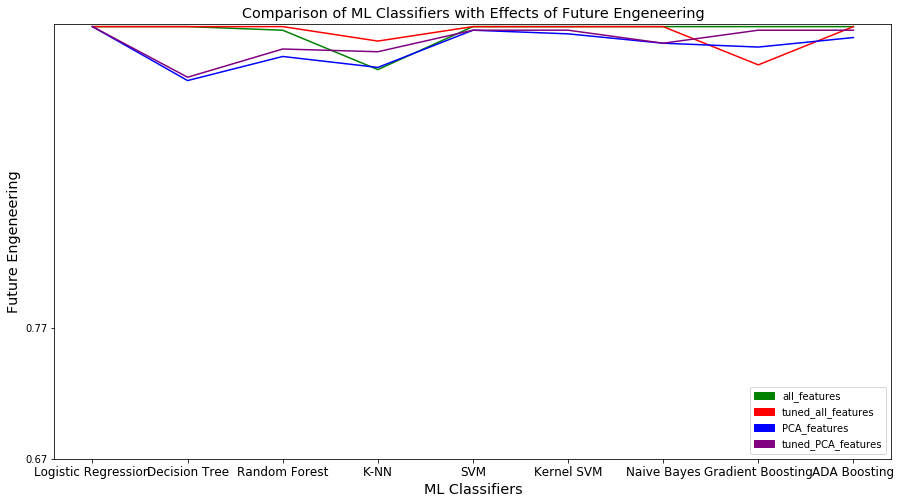

In [213]:
# Comparison of ML Classifiers with Effects of Feature Engineering
import matplotlib.patches as mpatches

r = [0,1,2,3,4,5,6,7,8]

# From raw value to percentage
A = comparison.iloc[:,0]
B = comparison.iloc[:,1]
C = comparison.iloc[:,2]
D = comparison.iloc[:,3]

# plot
barWidth = 0.85
names = ('Logistic Regression', 'Decision Tree', 'Random Forest', 'K-NN', 'SVM', 
         'Kernel SVM', 'Naive Bayes', 'Gradient Boosting', 'ADA Boosting')
fig = plt.figure(figsize=(15,8))

# Create green Bars
plt.plot(r, A, color='green')

# Create orange Bars
plt.plot(r, B, color='red')

# Create blue Bars
plt.plot(r, C, color='blue')

# Create purple Bars
plt.plot(r, D, color='purple')
 
# Custom x axis
plt.xticks(r, names, fontsize='large')
plt.yticks(np.arange(0.67,0.78,0.1))
plt.xlabel("ML Classifiers", fontsize='x-large')
plt.ylabel("Future Engeneering", fontsize='x-large')
plt.title("Comparison of ML Classifiers with Effects of Future Engeneering", fontsize='x-large')

green = mpatches.Patch(color='green', label='all_features')
orange = mpatches.Patch(color='red', label='tuned_all_features')
blue = mpatches.Patch(color='blue', label='PCA_features')
purple = mpatches.Patch(color='purple', label='tuned_PCA_features')
plt.legend(handles=[green, orange, blue, purple], loc=4)

# Show graphic
plt.show()

# Handling Target Class Imbalance
Since we have already noted the imbalance in the values within the target variable, let us implement the SMOTE method in the dealing with this skewed value in order to see whether we may improve our accuracy score.

In [214]:
# Specify the hyperparameter space
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

# Instantiate Support Vector Machine classifier: svm
svm = SVC(kernel='linear')

svm_cv = GridSearchCV(svm, param_grid, cv=5, scoring = 'f1_weighted')

# Fit to the training set
svm_cv.fit(X_train_sm, y_train_sm)

# Predict the labels of the test set: y_pred
y_pred = svm_cv.predict(X_test)

# Compute and print metrics
print("f1 score: {}".format(svm_cv.score(X_test, y_test)))
print("Tuned Model Parameters: {}".format(svm_cv.best_params_))

f1 score: 0.6905034013605442
Tuned Model Parameters: {'C': 0.1, 'gamma': 0.001}


# After 
SMOTE mechanism to improve target class imbalance and identifying best hyper-parameters, f1 score of our model did not show an improvement and decreased to 0.8276. Besides that, we should keep in mind that oversampling will generate artificial observations which may be tricky to evaluate the accuracy of the model.

# Conclusion
In the modeling and comparison section, we have seen the hyperparameter tuned support vector machine model has the highest f1 score (0.88) with tuned model parameters C:0.1 and gamma: 0.001. Even we try principal companent analysis to see the effects of less features in the modelling, it didn't improve model performance in SVM model. Besides that, we use SMOTHE technique to improve accuracy metric, but it didn't contribute any increase in model performance either.

It can be clearly seen the feature engineering effects on each individual nine model in 'Comparison of ML Classifiers with Effects of Future Engineering' chart above.

Below, we will see the most important feature coefficients plot and evaluate how they are important to interpret them in terms of attrition increase/decrease in the company.

# Most Important Features

In [215]:
from functools import reduce 


In [216]:
# Coefficients of feature importance (values for dictionary)
svr = SVC(kernel='linear', C = 0.1, gamma = 0.001)
clf = svr.fit(X_train, y_train)
clfc = clf.coef_

In [217]:
value = reduce(lambda x, y: x+y, clfc)
values = [x for x in value]
values

[2.7664898018527756e-05,
 -7.662310330151453e-05,
 -4.842645102511034e-05,
 -6.0910304309547136e-05,
 6.757776324223946e-05,
 0.00018975294917678368,
 4.5739805359437495e-05,
 4.476668299943935e-05,
 -0.0009046773286604769,
 1.4958000898233556e-05,
 3.9060564644581575e-05,
 5.072780831180158e-06,
 -0.00011230423012005379,
 0.00010821821740158652,
 9.14656310327562e-05,
 2.1399606363747478e-05,
 -0.00017221008495845597,
 0.00037288796013738856,
 8.439811418064352e-05,
 -5.2431699498992014e-05,
 8.413884491617618e-06,
 8.292354762906313e-05,
 1.710429190709961e-05,
 9.011898304383051e-05,
 -0.00020241581976855258,
 1.7684615938587584e-05,
 1.784288363246731e-05,
 6.597544780738429e-07,
 1.821837753995803e-05,
 1.3587838740128366e-05,
 -0.00046206431851344293,
 -0.00036336436555197554,
 7.929743649302129e-05,
 0.00018430771287421006,
 6.973065033490794e-05,
 -6.536906072267257e-06,
 8.28763958047457e-06,
 8.577292619947607e-05,
 -4.339493857516419e-06,
 -3.2753371231715456e-05,
 5.4466692

In [218]:
df4 = df3.drop('Attrition', axis =1)

In [219]:
# Dictionary for feature importance - keys and values
idx = df4.columns
keys = [str(x) for x in idx.tolist()]
pairs = {keys[i]: values[i] for i in range(len(keys))}

In [220]:
pairs

{'Age_(22-25)': 5.072780831180158e-06,
 'Age_(26-35)': -0.00011230423012005379,
 'Age_(36-60)': 0.00010821821740158652,
 'BusinessTravel_Travel_Frequently': 9.14656310327562e-05,
 'BusinessTravel_Travel_Rarely': 2.1399606363747478e-05,
 'DailyRate': 2.7664898018527756e-05,
 'Department_Research & Development': -0.00017221008495845597,
 'Department_Sales': 0.00037288796013738856,
 'DistanceFromHome': -7.662310330151453e-05,
 'EducationField_Life Sciences': 8.439811418064352e-05,
 'EducationField_Marketing': -5.2431699498992014e-05,
 'EducationField_Medical': 8.413884491617618e-06,
 'EducationField_Other': 8.292354762906313e-05,
 'EducationField_Technical Degree': 1.710429190709961e-05,
 'Gender_Male': 9.011898304383051e-05,
 'HourlyRate': -4.842645102511034e-05,
 'JobRole_Human Resources': -0.00020241581976855258,
 'JobRole_Laboratory Technician': 1.7684615938587584e-05,
 'JobRole_Manager': 1.784288363246731e-05,
 'JobRole_Manufacturing Director': 6.597544780738429e-07,
 'JobRole_Resear

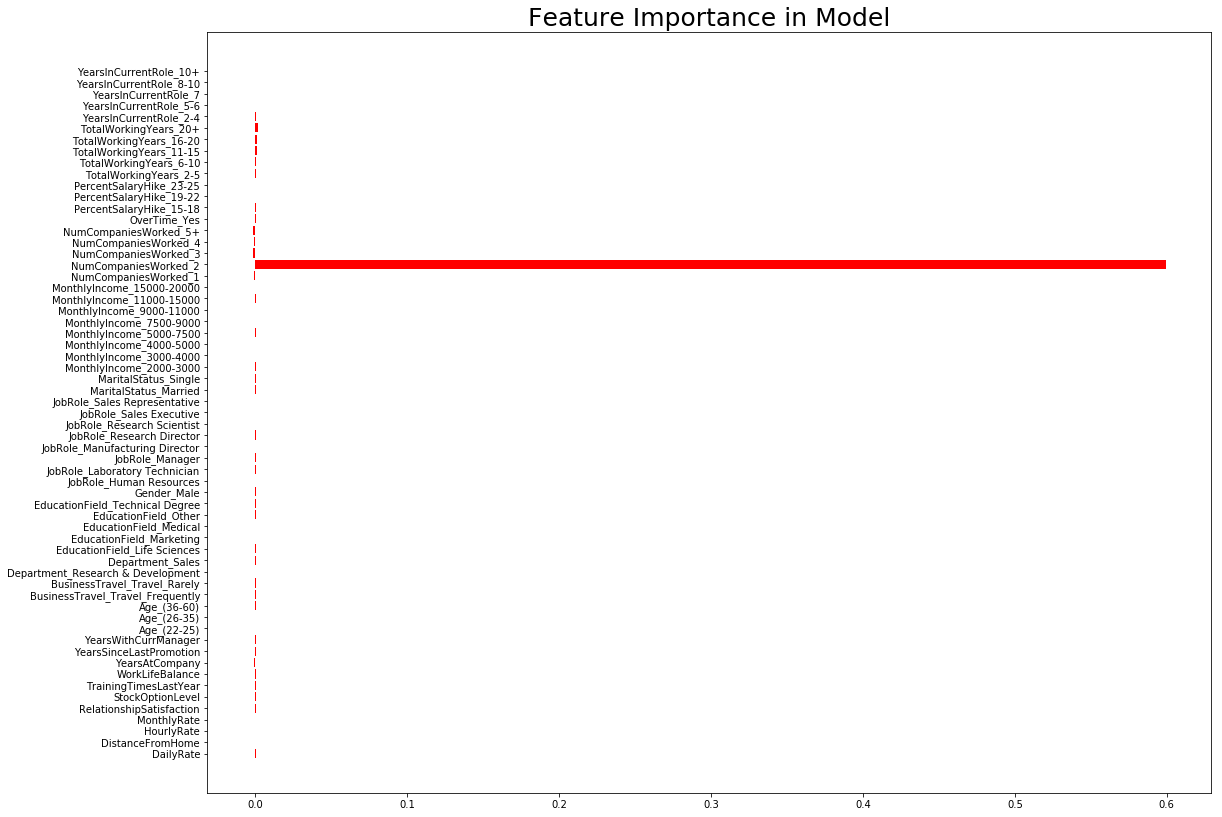

In [221]:
# Plotting feature importance for SVM model
names = list(pairs.keys())
values = list(pairs.values())

plt.figure(figsize=(18,14))
plt.barh(range(len(pairs)), values, tick_label = names, color = 'red')
plt.title('Feature Importance in Model', fontsize = 25)
plt.show()